<a href="https://colab.research.google.com/github/gabrielterceiro/ReadPDF/blob/main/sale_extract.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
#install pdfplumber package to extract the text from pdf
!pip install pdfplumber

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [20]:
#imports
import pdfplumber
import re
from collections import namedtuple
import pandas as pd
import matplotlib.pyplot as plt
import requests

In [21]:
#create the named tuple pattern
Sale = namedtuple('Sale', 'dt_sale cd_prod nm_prod qt_prod vl_prod')

In [22]:
def download_file(url):
    local_filename = url.split('/')[-1]
    
    with requests.get(url) as r:
        with open(local_filename, 'wb') as f:
            f.write(r.content)
        
    return local_filename

In [23]:
ap_url = 'https://github.com/gabrielterceiro/ReadPDF/raw/main/DadosAnalise.pdf'

In [24]:
ap = download_file(ap_url)

In [25]:
#using pdfplumber to open the semi structured pdf file and add the text from all pages to a variable
with pdfplumber.open(ap) as pdf:
    text = ''
    for page in pdf.pages:
        text += page.extract_text() 

In [26]:
#create regular expressions to find the sale dates and sale details
new_dt_re = re.compile(r'^([D][at]{3}) (.*)') 
new_sale_re = re.compile(r'\d+ [\w\s]+ (\d+) (.*) ([\d,]+\d{2}) [0] ([\d,]+\d{2})')

In [27]:
#initialize an empty list to append later
lst_sale = []

#run through every line of the text
for line in text.split('\n'):
    #if the line contains a date, stores the date in a variable
    if new_dt_re.match(line):
        dt_string, dt_sale = line.split()

    #if the line contains a sale, stores the important information in their respective variables
    line = new_sale_re.search(line)
    if line:
        cd_prod = line.group(1)
        nm_prod = line.group(2)
        qt_prod = line.group(3)
        vl_prod = line.group(4)
        #append into the list the named tuple with the sale data
        lst_sale.append(Sale(dt_sale, cd_prod, nm_prod, qt_prod, vl_prod))

In [28]:
#stores the data into a dataframe
df = pd.DataFrame(lst_sale)

In [29]:
#takes a string in a x,xx format and slices the ',xx' part off
def getInt(input):
  number = input[:-3]
  return int(number)

In [30]:
#takes a string in a x,xx format and takes the comma off so that the value is stored in cents
def getCents(input):
  number = input.replace(',', '')
  return int(number)

In [31]:
#bubble sort the 2 lists at the same time
def bubbleSortTwoLists(list1, list2):
  n = len(list1)

  for i in range(n):
    already_sorted = True
    for j in range(n - i - 1):
      if list2[j] > list2[j+1]:
        list2[j], list2[j + 1] = list2[j + 1], list2[j]
        list1[j], list1[j + 1] = list1[j + 1], list1[j]
        already_sorted = False
    if already_sorted:
              break
  return list1, list2

#Listing the 10 most sold items by quantity

In [32]:
#iterates through all the rows in the dataframe, lists the unique items and sums the amount of items sold
list_items = []
list_amount = []
i = 0
for item in df['nm_prod']:
  if item not in list_items:
    list_items.append(item)
    list_amount.append(getInt(df.iloc[i]['qt_prod']))
  
  if item in list_items:
    list_amount[list_items.index(item)] += getInt(df.iloc[i]['qt_prod'])
  i += 1

In [33]:
list_items, list_amount = bubbleSortTwoLists(list_items, list_amount)

In [34]:
#chops off the 10 last items in the lists
list_items, list_amount = list_items[-10:], list_amount[-10:]

#Graphing the 10 most sold items by quantity

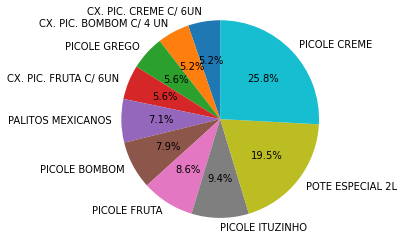

In [35]:
fig1, ax1 = plt.subplots()

ax1.pie(list_amount, labels = list_items, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')

plt.show()

#Listing the 10 most sold items by value

In [36]:
#iterates through all the rows in the dataframe, lists the unique items and sums the value of items sold
list_items = []
list_values = []
i = 0
for item in df['nm_prod']:
  if item not in list_items:
    list_items.append(item)
    list_values.append(getCents(df.iloc[i]['vl_prod']))
  
  if item in list_items:
    list_values[list_items.index(item)] += getCents(df.iloc[i]['vl_prod'])
  i += 1

In [37]:
list_items, list_values = bubbleSortTwoLists(list_items, list_values)

In [38]:
list_items, list_values = list_items[-10:], list_values[-10:]

#Graphing the 10 most sold items by value

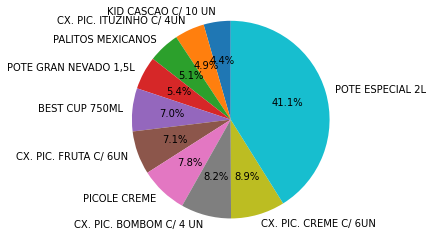

In [39]:
fig1, ax1 = plt.subplots()

ax1.pie(list_values, labels = list_items, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')

plt.show()